# COGS 108 - Final Project

# Introduction and background

## Overview
<span style="color:red">Overview here

Write a clear summary of what you did

Limit overview to 3-4 sentences
</span>.


## Names and IDs
<pre>
| Name        | PID       |
|-------------|-----------|
| Yuxin Zou   | A13996888 |
| Vinci Reyes | A14155362 |
| Chase Rowe  | A13881018 |
| Eason Chang | A12986131 |
| Alex Liang  | A13875895 |
</pre>

## Research Quesiton
How effectively do shot statistics predict win rate?

<span style="color:red">
❏ Include your specific data science question
    
❏ Make sure what you’re measuring (variables) to answer question is clear
</span>

## Background
Several of our group members relish in the excitement of a good basketball game. Basketball quickly became our main focus and thus became the topic of our research question. During our initial data scraping, we found a research paper written by a student from UC Berkeley in 2015 (https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Stanley_Yang%20_Thesis.pdf). It outlines how to predict trends or patterns in a team’s dynamic using regression analysis of publicly available basketball statistics. The student predicts 6 out of 8 teams that have gone to the playoffs during the time frame he is studying using the data he refines.

In sports news, newscasters and fans alike claim today’s basketball game trends are not what they used to be. In this project we are looking back at how shooting and scoring has evolved in the NBA over time from 1996 until the most recent season. We look to examine which types of shots were the most popular throughout these years and how this change relates to winning. News stations like ESPN (http://www.espn.com/nba/statistics) use statistics to rank players against each other to determine who is the “best” at each category. We specifically look at “Field Goal Percentage” and “Points” under the offensive category. ESPN provides many other categorical rankings based on other criteria which enforces the idea of needing a well rounded team instead of a single gimmick like extraordinary shot accuracy but terrible overall defence. In theory, the perfect team of 2019 would consist of 5 out of the 6 ranking leaders ESPN recognizes. ESPN provides raw data about each player which scouters interpret later. Scouters find promising new players and try to recruit them onto their employers’ team. The data that ESPN offers only accounts for players already in the NBA but it archives those players’ performance over time. Players who perform poorly will have their contract sold and they will be placed on another team.

Another sports news station, Fox Sports (https://www.foxsports.com/nba/scores), claims that the main player statistics fans pay the most attention to are the number of points scored, number of rebounds intercepted, and number of assists. These statistics are whole numbers which fans can interpret easier. Player A having a 98% shot accuracy and 4 points means nothing if Player B scores 28 points with a measly 23% accuracy. Bigger numbers generate more hype for the fans to relish. Whole number statistics are easier to digest and interpret than their percentile counterparts which may be one of the reasons Fox Sports only includes the aforementioned stats. Fox Sports provides raw holistic data like number of points scored but also provides other data like injury, game schedules, top 6 ranking categories, and player news.

## Prior Work
Halfway through our project, we found out that one of the published report on github (https://github.com/COGS108/FinalProjects-Wi18/blob/master/001-FinalProject.ipynb) has a very similar topic: they investigated the effectiveness of a 3-point driven strategy on team shots data. They observed that the years that a higher number of 3-point shots attempted that have a positive effect on playoff rankding further outnumbered that of a negative effect, thereby concluding that adopting a 3-point strategy is preferrable in making the playoffs. However, their definition of effectiveness is limited to the playoffs and therefore not direcltly linked to teams' performance in the regular season. Also, only observing the majority of effectiveness scores are positive cannot necessarily prove the statistical significance of the outcome. We plan to develop more complex metrics/features and comprehensive analysis of the regression.

## Hypothesis
<span style="color:red">
    
❏ Include your team’s hypothesis

❏ Ensure that this hypothesis is clear to readers

❏ Explain why you think this will be the outcome (what was your thinking?)
</span>

# Datasets

## Data Collection (team shots)

First, we collected shooting data from the official NBA website (https://stats.nba.com/teams/shooting/?Season=2018-19&SeasonType=Regular%20Season&DistanceRange=8ft%20Range&PerMode=Totals). 

Definitions:
- FGM: Field Goals Made
- FGA: Field Goals Attempted
- FG%: Field Goals Percentage
- Less than 8 feet: Close Range
- 8-16 feet: Mid Range
- 16-24 feet: Long Range
- 24+ feet: Three Pointer
- Backcourt Shot

We were able to copy each team’s shooting data from the season 1996-1997 all the way until the most recent season 2018-2019 into one google sheets document, with each sheet representing a season. Before we could import this data into python using pandas’s data frame, we have to first do some work.

![](writeup-img/data-shots-image-1.png)

We immediately notice certain things. The top most row represents each types of different shots. With data frame’s structure in mind, the second row with FGM, FGA, and FG% will be each column’s label. In order to be able to access each column’s data accurately without trouble, we have to do some manipulation to that label to make each column’s label unique. For example, FGM in less than 8 feet with be changed to FGM-C, FGM within 8-16 feet with be changed to FGM-L, etc. In our data, we can also eliminate the three rows for backcourt shots, since they are not a type of shot normally taken in a game situation, these are shots taken way out of range near the end of a quarter (play period). Therefore, it is safe to eliminate these three columns in Backcourt Shot and still preserve the data integrity. 


![](writeup-img/data-shots-image-2.png)

Now we are ready to download it into a csv and import it into python through pandas.

## Data Cleaning / Pre-processing

### Preparation

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import glob
import os
import re
import patsy
import statsmodels.api as sm

**The first step we need to do is to combine the data from all the years into one giant dataframe.**

In [2]:
# FG is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')

In [3]:
# We want to add the name of the season to the dataframe
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

# A sample of the `YEAR_SPAN` and `Year` column
YEARs[:5]

[('1998-1999', '1998'),
 ('2002-2003', '2002'),
 ('2007-2008', '2007'),
 ('2009-2010', '2009'),
 ('2014-2015', '2014')]

In [4]:
# Read these csv into dataframes

FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

# Add the `YEAR_SPAN` and `Year` column in a for loop

for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int) # Convert to integer type

### Joining data

In [5]:
# Join the dataframe (concatenation)

df = pd.concat(FG, ignore_index=True)
df.sample(10)

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
512,Golden State Warriors,1534,3020,50.8,481,1467,32.8,640,1726,37.1,281,948,29.6,2000-2001,2000
244,Detroit Pistons,2035,3723,54.7,250,701,35.7,390,1120,34.8,506,1555,32.5,2013-2014,2013
455,Indiana Pacers,1368,2477,55.2,572,1450,39.4,590,1458,40.5,405,1173,34.5,2001-2002,2001
91,Chicago Bulls,1503,2736,54.9,412,978,42.1,814,2045,39.8,352,1053,33.4,2009-2010,2009
405,Oklahoma City Thunder,1558,2622,59.4,476,1086,43.8,494,1207,40.9,596,1574,37.9,2012-2013,2012
371,Milwaukee Bucks,1722,2883,59.7,466,1035,45.0,352,868,40.6,717,2007,35.7,2017-2018,2017
608,Milwaukee Bucks,1280,2374,53.9,341,872,39.1,445,1141,39.0,430,1249,34.4,2011-2012,2011
408,Phoenix Suns,1523,2769,55.0,409,1055,38.8,649,1638,39.6,479,1438,33.3,2012-2013,2012
618,Sacramento Kings,1504,2816,53.4,220,614,35.8,355,981,36.2,410,1284,31.9,2011-2012,2011
88,Atlanta Hawks,1682,2892,58.2,341,845,40.4,634,1609,39.4,523,1434,36.5,2009-2010,2009


### Replacing team names
**By looking at the number of appearance for each team in the whole dataset, we notice there are teams that have changed their names.**

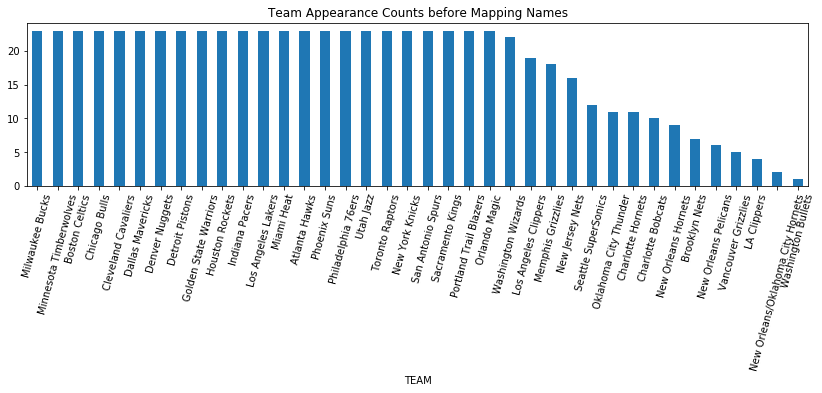

In [6]:
def display_team_counts(df, title):
    fig, ax = plt.subplots(0)
    ax = df.groupby("TEAM")['YEAR'].nunique().sort_values(ascending=False) \
           .plot.bar(figsize=(14, 3))
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=75)
    plt.title(title)
    plt.show()
    
display_team_counts(df, 'Team Appearance Counts before Mapping Names')

In [8]:
# Function definition for replacing team names
# Data source: manual googling.

def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets' or name == 'New Orleans/Oklahoma City Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

# Replacing
df['TEAM'] = df['TEAM'].apply(replace_team_name)

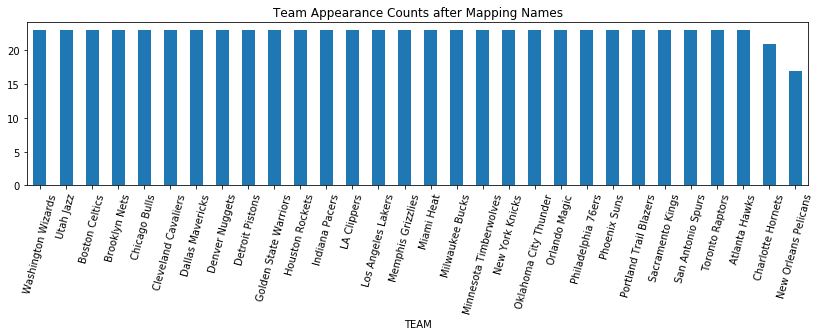

In [9]:
display_team_counts(df, 'Team Appearance Counts after Mapping Names')

**We are able to see that most of the teams have been in the NBA from all the years in the dataset.**

## Data Collection (season ranking)
<font size="3" color="red">Add stuff for win data here</font>

**We decided to get our seasonal win data from the same source, using html requests**

In [19]:
def standarize_team_name(name):
    out = name.split('(')[0]
    out = out.replace('*', '')
    out = out.strip()
    
    return out

In [35]:
big_df = []

division = [
    'Atlantic Division', 'Central Division', 'Northwest Division', 'Southeast Division',
    'Southwest Division', 'Pacific Division', 'Midwest Division'
]


for year in range(1997, 2019+1):
    nba_year = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) + '_standings.html'
    data = pd.read_html(nba_year)

    data[0] = data[0].rename(index=str, columns={"Eastern Conference": "TEAM"})
    data[1] = data[1].rename(index=str, columns={"Western Conference": "TEAM"})

    df_data = pd.concat(data[:2], sort=False, ignore_index=True)

    df_data['TEAM'] = df_data['TEAM'].apply(standarize_team_name)

    df_data = df_data.drop(columns = ['GB', 'SRS'])

    # Drop excess rows that contain useless information
    for div in division:
        df_data = df_data[df_data.TEAM != div]

    df_data['YEAR_SPAN'] = str(year - 1) + '-' + str(year)
    df_data['YEAR'] = str(year - 1)
    big_df.append(df_data)

In [37]:
win_df = pd.concat(big_df, sort=False, ignore_index=True)
win_df

,TEAM,W,L,W/L%,PS/G,PA/G,YEAR_SPAN,YEAR
0,Miami Heat,61,21,.744,94.8,89.3,1996-1997,1996
1,New York Knicks,57,25,.695,95.4,92.2,1996-1997,1996
2,Orlando Magic,45,37,.549,94.1,94.5,1996-1997,1996
3,Washington Bullets,44,38,.537,99.4,97.7,1996-1997,1996
4,New Jersey Nets,26,56,.317,97.2,101.8,1996-1997,1996
5,Philadelphia 76ers,22,60,.268,100.2,106.7,1996-1997,1996
6,Boston Celtics,15,67,.183,100.6,107.9,1996-1997,1996
7,Chicago Bulls,69,13,.841,103.1,92.3,1996-1997,1996
8,Atlanta Hawks,56,26,.683,94.8,89.4,1996-1997,1996
9,Detroit Pistons,54,28,.659,94.2,88.9,1996-1997,1996


### Missingness analysis

**This shows that there is no missing data in all the rows and columns. So there is no need to impute missing data here.**

In [17]:
df.notna().all().all()

True

# Data Visualization

# Data analysis and results

### Developing metric

As a starter, we want to verify the trend that teams are attempting more shots that are further away in order to score more. However, the data we have are limited in the sense that shots are grouped in a range type and it is difficult to compare all types of shots in terms of trend. So we come up with a metric that takes in the number of shots for each type and multiply them by their respective distance. We can call this metric `Approximated Average Shot Distance`.

For each group (A. Less than 8 feet: Close Range, B. 8-16 feet: Mid Range, C. 16-24 feet: Long Range, D. 24+ feet: Three Pointer), we approximated a best guess of the average shot distance for each group. They are:
 - 5 feet for Close Range
 - 12 feet for Mid Range
 - 20 feet for Long Range
 - 25 feet for Three Pointer

In [30]:
# Function definition:
# Takes in a series of data from one year for a team
# Returns the approximated average shot distance

def average_shooting_dist(s):
    sum_all_distances = 5 * s['FGA-C'] + 12 * s['FGA-M'] + 20 * s['FGA-L'] + 25 * s['FGA-T']
    num_of_attempts = s['FGA-C'] + s['FGA-M'] + s['FGA-L'] + s['FGA-T']
    return sum_all_distances / num_of_attempts

# Calculate and add to dataframe
df['avg_shot_dist'] = df.apply(average_shooting_dist, axis=1)

`Approximated Average Shot Distance`

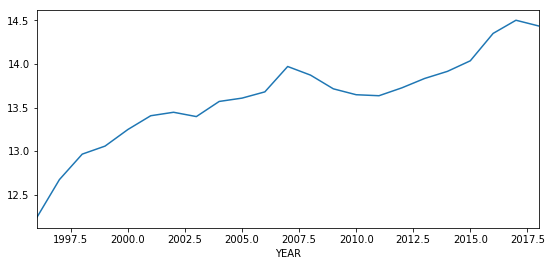

In [31]:
df.groupby('YEAR')['avg_shot_dist'].mean().plot(figsize=(9, 4), );